In [1]:
from SpecReduction import SpecFunctions as sf
import numpy as np
import pandas as pd
import scipy
import scipy.optimize as opt
from scipy.optimize import curve_fit
import specreduce
from specreduce import WavelengthCalibration1D as wav_cal
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from aquarel import load_theme
from astropy import units as u
from skimage.transform import rotate

In [2]:
theme = load_theme('arctic_dark')
theme.apply()

In [3]:
ThAr01_85_flipped = fits.open('FITS_shortcut/ThAr85_01_flipped.fits')[0].data
ThAr01_85_flipped = ThAr01_85_flipped.byteswap().newbyteorder()
ThAr02_85_flipped = fits.open('FITS_shortcut/ThAr85_02_flipped.fits')[0].data
ThAr02_85_flipped = ThAr02_85_flipped.byteswap().newbyteorder()
ThAr03_85_flipped = fits.open('FITS_shortcut/ThAr85_03_flipped.fits')[0].data
ThAr03_85_flipped = ThAr03_85_flipped.byteswap().newbyteorder()

(1.0, 7285, 0.8115290190797146, 495)
0.8437649124987647


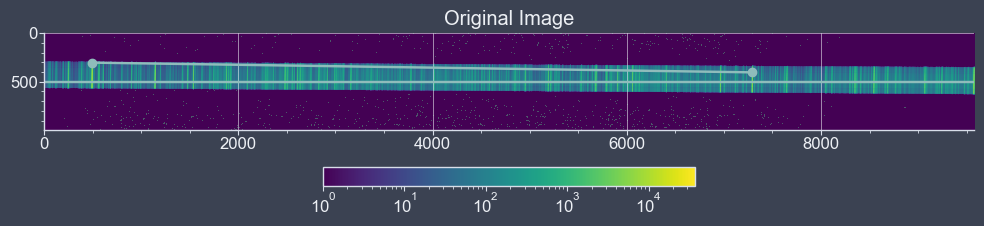

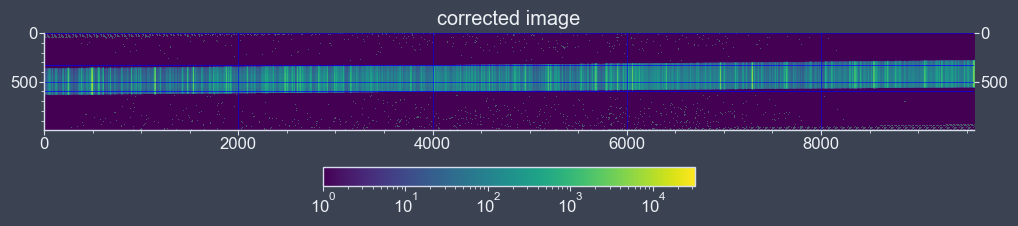

(1.0, 7285, 0.9481440287345766, 495)
-0.4725317977744817


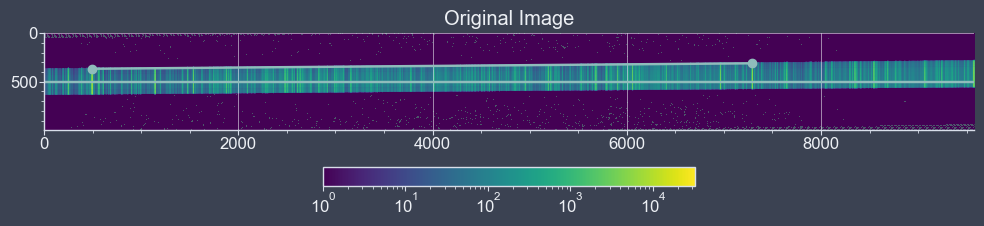

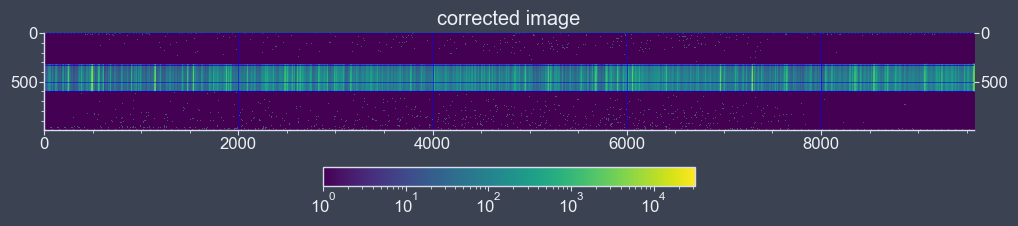

In [4]:
ThAr01_85_img = sf.straight_spec(ThAr01_85_flipped)
ThAr01_85_img = sf.straight_spec(ThAr01_85_img)

(1.0, 9564, 0.7539324097657949, 8537)
0.33473297557995085


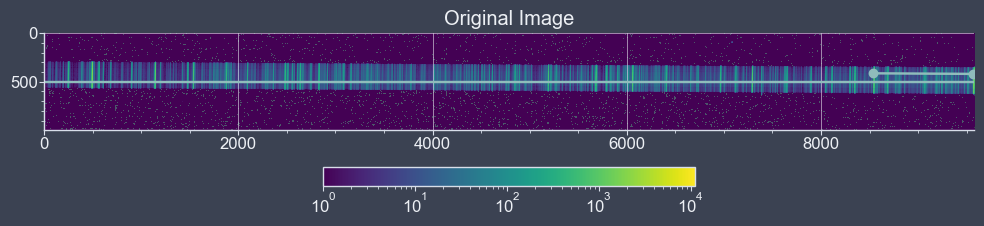

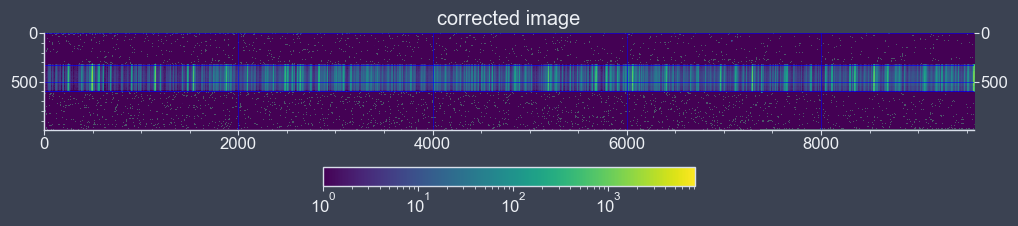

In [5]:
ThAr02_85_img = sf.straight_spec(ThAr02_85_flipped)

(1.0, 495, 0.8506513546985623, 7285)
0.8522013234108549


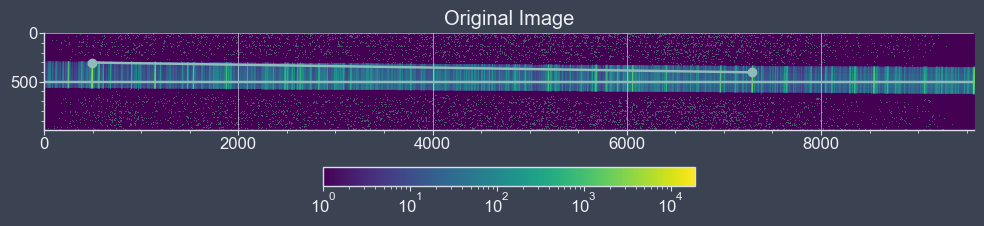

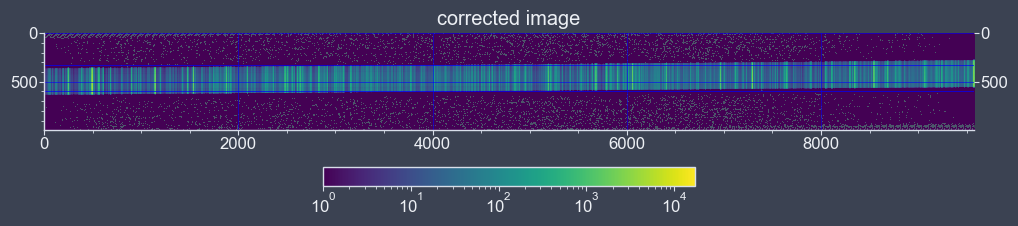

(1.0, 495, 0.7847125190848564, 7285)
-0.4809694726672397


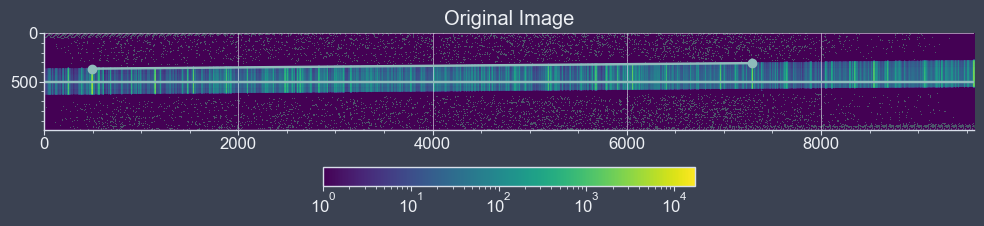

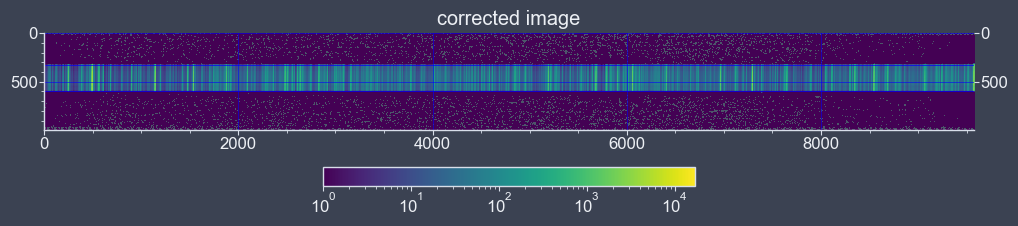

In [6]:
ThAr03_85_img = sf.straight_spec(ThAr03_85_flipped)
ThAr03_85_img = sf.straight_spec(ThAr03_85_img)

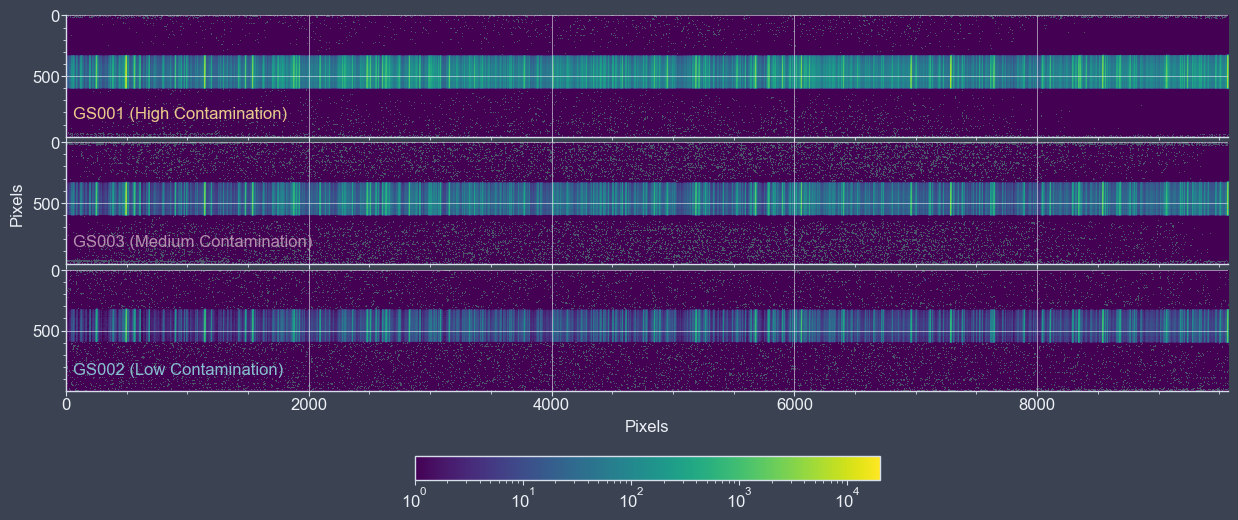

In [7]:
fig, ax = plt.subplots(3, 1, sharex = True,  figsize = (15, 8), gridspec_kw = {'hspace':-0.65})
ax[0].imshow(ThAr01_85_img, norm = 'log', vmin = 1, vmax = 10**4.3)
im = ax[2].imshow(ThAr02_85_img, norm = 'log', vmin = 1, vmax = 10**4.3)
ax[1].imshow(ThAr03_85_img, norm = 'log', vmin = 1, vmax = 10**4.3)
ax[2].set_xlabel('Pixels')
ax[1].set_ylabel('Pixels')
fig.text(0.13, 0.6, 'GS001 (High Contamination)', c = '#ebcb8b'
         # , backgroundcolor = 'white'
        )
fig.text(0.13, 0.28, 'GS002 (Low Contamination)', c = '#88c0d0'
         # , backgroundcolor = 'white'
        )
fig.text(0.13, 0.44, 'GS003 (Medium Contamination)', c = '#b48ead'
         # , backgroundcolor = 'white'
        )
fig.colorbar(im, location = 'bottom', shrink = 0.4, pad = 0.18)
# fig.tight_layout()
plt.savefig('Contamination_comp.png')
plt.show()

In [8]:
poi_known_wave = np.array([5720.18, 5760.55, 5804.14])
poi_known_i = np.array([0.585, 1, 0.34])
wavesol_coeff = np.array([-8.957e-11, 3.783e-7, 0.132, 4812])
wavesol_eq = np.poly1d(wavesol_coeff)

In [9]:
ThAr01_85_spec = sf.make1D(ThAr01_85_img, False)
ThAr02_85_spec = sf.make1D(ThAr02_85_img, False)
ThAr03_85_spec = sf.make1D(ThAr03_85_img, False)

ThAr_85_pix = np.linspace(0,ThAr01_85_spec.size - 1, ThAr01_85_spec.size)
ThAr_85_wavelength = wavesol_eq(ThAr_85_pix)



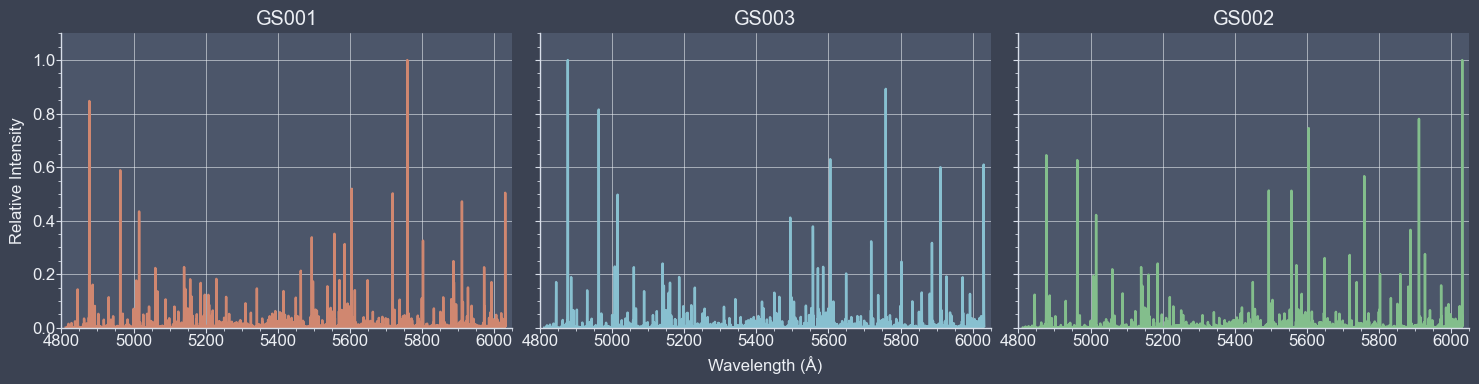

In [10]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (15, 4))
ax[0].plot(ThAr_85_wavelength, ThAr01_85_spec, c = '#d08770')
ax[0].set_title('GS001')
ax[0].set_ylabel('Relative Intensity')
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(4800, 6050)
ax[1].plot(ThAr_85_wavelength, ThAr03_85_spec, c = '#88c0d0')
ax[1].set_title('GS003')
ax[1].set_xlabel('Wavelength (Å)')
ax[1].set_ylim(0, 1.1)
ax[1].set_xlim(4800, 6050)
ax[2].plot(ThAr_85_wavelength, ThAr02_85_spec, c = '#83be8c')
ax[2].set_title('GS002')
ax[2].set_ylim(0, 1.1)
ax[2].set_xlim(4800, 6050)
fig.tight_layout()
plt.show()

In [11]:
ThAr01_85_peak_props = sf.find_peaks(ThAr01_85_spec, 0.2)
ThAr02_85_peak_props = sf.find_peaks(ThAr02_85_spec, 0.2)
ThAr03_85_peak_props = sf.find_peaks(ThAr03_85_spec, 0.2)

ThAr01_85_peak_locs, ThAr01_85_peak_vals,ThAr01_85_fw, ThAr01_85_fwhm = ThAr01_85_peak_props
ThAr01_85_peak_wavelengths = wavesol_eq(ThAr01_85_peak_locs)

ThAr02_85_peak_locs, ThAr02_85_peak_vals, ThAr02_85_fw, ThAr02_85_fwhm = ThAr02_85_peak_props
ThAr02_85_peak_wavelengths = wavesol_eq(ThAr02_85_peak_locs)

ThAr03_85_peak_locs, ThAr03_85_peak_vals, ThAr03_85_fw, ThAr03_85_fwhm = ThAr03_85_peak_props
ThAr03_85_peak_wavelengths = wavesol_eq(ThAr03_85_peak_locs)

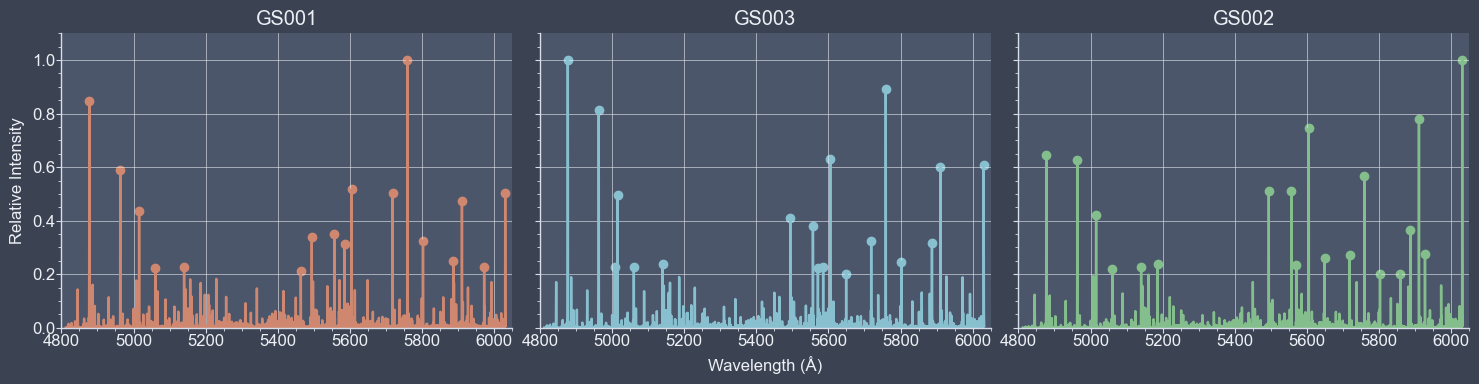

In [12]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (15, 4))
ax[0].plot(ThAr_85_wavelength, ThAr01_85_spec, c = '#d08770')
ax[0].scatter(ThAr01_85_peak_wavelengths, ThAr01_85_peak_vals, c = '#d08770')
ax[0].set_title('GS001')
ax[0].set_ylabel('Relative Intensity')
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(4800, 6050)
ax[1].plot(ThAr_85_wavelength, ThAr03_85_spec, c = '#88c0d0')
ax[1].scatter(ThAr03_85_peak_wavelengths, ThAr03_85_peak_vals, c = '#88c0d0')
ax[1].set_title('GS003')
ax[1].set_xlabel('Wavelength (Å)')
ax[1].set_ylim(0, 1.1)
ax[1].set_xlim(4800, 6050)
ax[2].plot(ThAr_85_wavelength, ThAr02_85_spec, c = '#83be8c')
ax[2].scatter(ThAr02_85_peak_wavelengths, ThAr02_85_peak_vals, c = '#83be8c')
ax[2].set_title('GS002')
ax[2].set_ylim(0, 1.1)
ax[2].set_xlim(4800, 6050)
fig.tight_layout()
plt.show()

In [13]:
main_index01 = 11
ThAr01_85_poi_wavelengths = np.array([ThAr01_85_peak_wavelengths[main_index01 - 1], ThAr01_85_peak_wavelengths[main_index01], ThAr01_85_peak_wavelengths[main_index01 + 1]])        
ThAr01_85_poi_locs = np.array([ThAr01_85_peak_locs[main_index01 - 1], ThAr01_85_peak_locs[main_index01], ThAr01_85_peak_locs[main_index01 + 1]])        
ThAr01_85_poi_i = np.array([ThAr01_85_peak_vals[main_index01 - 1], ThAr01_85_peak_vals[main_index01], ThAr01_85_peak_vals[main_index01 + 1]])
ThAr01_85_poi_fw = np.array([ThAr01_85_fw[main_index01 - 1], ThAr01_85_fw[main_index01], ThAr01_85_fw[main_index01 + 1]])
ThAr01_85_poi_fwhm = np.array([ThAr01_85_fwhm[main_index01 - 1], ThAr01_85_fwhm[main_index01], ThAr01_85_fwhm[main_index01 + 1]])
ThAr01_85_poi_props = np.array([ThAr01_85_poi_locs, ThAr01_85_poi_i, ThAr01_85_poi_fw, ThAr01_85_poi_fwhm])

main_index02 = 12
ThAr02_85_poi_wavelengths = np.array([ThAr02_85_peak_wavelengths[main_index02 - 1], ThAr02_85_peak_wavelengths[main_index02], ThAr02_85_peak_wavelengths[main_index02 + 1]])  
ThAr02_85_poi_locs = np.array([ThAr02_85_peak_locs[main_index02 - 1], ThAr02_85_peak_locs[main_index02], ThAr02_85_peak_locs[main_index02 + 1]])
ThAr02_85_poi_i = np.array([ThAr02_85_peak_vals[main_index02 - 1], ThAr02_85_peak_vals[main_index02], ThAr02_85_peak_vals[main_index02 + 1]])
ThAr02_85_poi_fw = np.array([ThAr02_85_fw[main_index02 - 1], ThAr02_85_fw[main_index02], ThAr02_85_fw[main_index02 + 1]])
ThAr02_85_poi_fwhm = np.array([ThAr02_85_fwhm[main_index02 - 1], ThAr02_85_fwhm[main_index02], ThAr02_85_fwhm[main_index02 + 1]])
ThAr02_85_poi_props = np.array([ThAr02_85_poi_locs, ThAr02_85_poi_i, ThAr02_85_poi_fw, ThAr02_85_poi_fwhm])

main_index03 = 13
ThAr03_85_poi_wavelengths = np.array([ThAr03_85_peak_wavelengths[main_index03 - 1], ThAr03_85_peak_wavelengths[main_index03], ThAr03_85_peak_wavelengths[main_index03 + 1]])        
ThAr03_85_poi_locs = np.array([ThAr03_85_peak_locs[main_index03 - 1], ThAr03_85_peak_locs[main_index03], ThAr03_85_peak_locs[main_index03 + 1]])        
ThAr03_85_poi_i = np.array([ThAr03_85_peak_vals[main_index03 - 1], ThAr03_85_peak_vals[main_index03], ThAr03_85_peak_vals[main_index03 + 1]])
ThAr03_85_poi_fw = np.array([ThAr03_85_fw[main_index03 - 1], ThAr03_85_fw[main_index03], ThAr03_85_fw[main_index03 + 1]])
ThAr03_85_poi_fwhm = np.array([ThAr03_85_fwhm[main_index03 - 1], ThAr03_85_fwhm[main_index03], ThAr03_85_fwhm[main_index03 + 1]])
ThAr03_85_poi_props = np.array([ThAr03_85_poi_locs, ThAr03_85_poi_i, ThAr03_85_poi_fw, ThAr03_85_poi_fwhm])

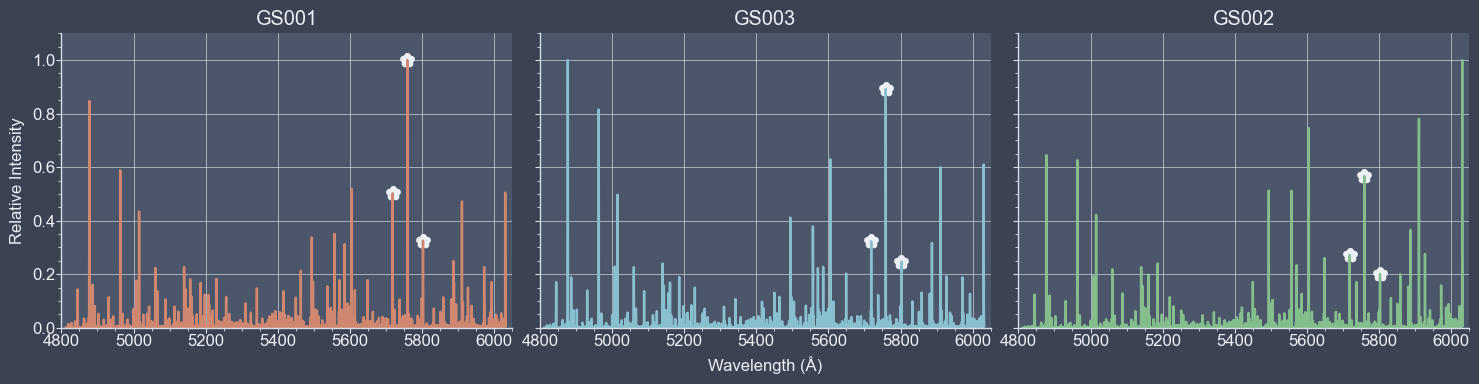

In [14]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (15, 4))
ax[0].plot(ThAr_85_wavelength, ThAr01_85_spec, c = '#d08770')
ax[0].scatter(ThAr01_85_poi_wavelengths, ThAr01_85_poi_i, color = '#eceff4', marker = '*', lw = 5)
ax[0].set_title('GS001')
ax[0].set_ylabel('Relative Intensity')
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(4800, 6050)
ax[1].plot(ThAr_85_wavelength, ThAr03_85_spec, c = '#88c0d0')
ax[1].scatter(ThAr03_85_poi_wavelengths, ThAr03_85_poi_i, color = '#eceff4', marker = '*', lw = 5)
ax[1].set_title('GS003')
ax[1].set_xlabel('Wavelength (Å)')
ax[1].set_ylim(0, 1.1)
ax[1].set_xlim(4800, 6050)
ax[2].plot(ThAr_85_wavelength, ThAr02_85_spec, c = '#83be8c')
ax[2].scatter(ThAr02_85_poi_wavelengths, ThAr02_85_poi_i, color = '#eceff4', marker = '*', lw = 5)
ax[2].set_title('GS002')
ax[2].set_ylim(0, 1.1)
ax[2].set_xlim(4800, 6050)
fig.tight_layout()
plt.show()

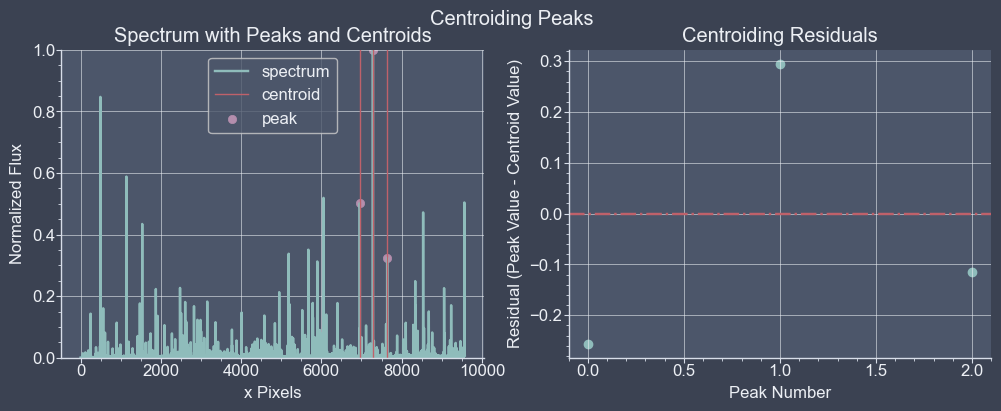

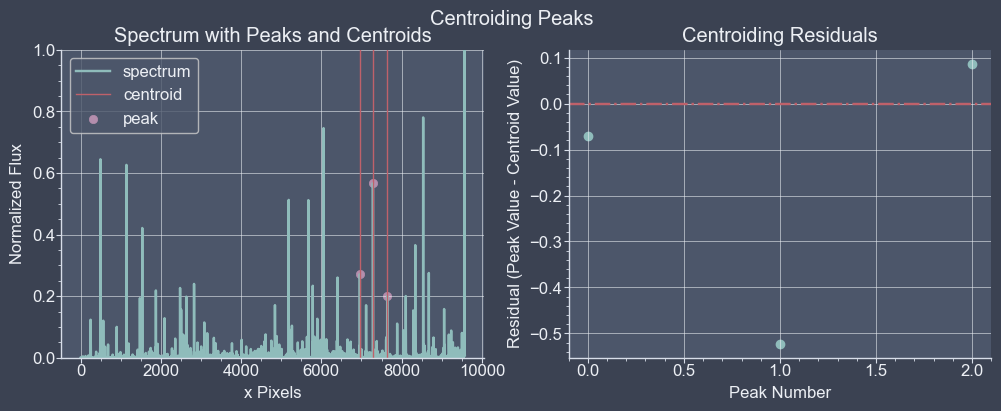

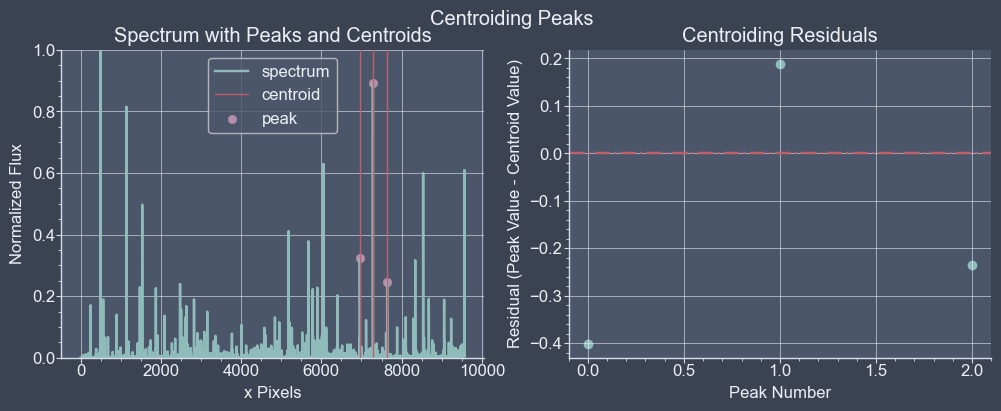

In [15]:
ThAr01_85_poi_centroid = sf.centroid(ThAr01_85_spec, ThAr_85_pix, ThAr01_85_poi_props)
ThAr02_85_poi_centroid = sf.centroid(ThAr02_85_spec, ThAr_85_pix, ThAr02_85_poi_props)
ThAr03_85_poi_centroid = sf.centroid(ThAr03_85_spec, ThAr_85_pix, ThAr03_85_poi_props)
plt.show()

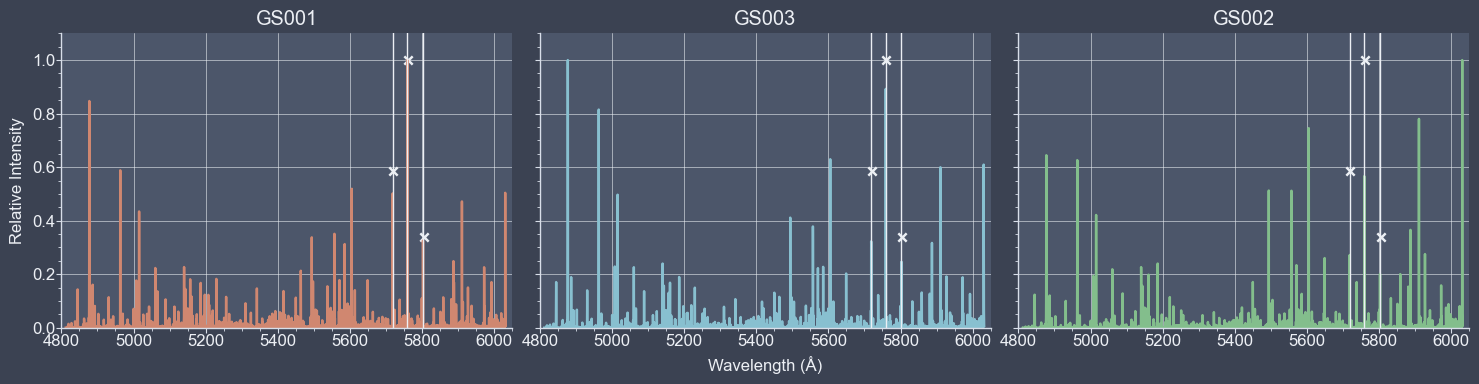

In [16]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (15, 4))
ax[0].plot(ThAr_85_wavelength, ThAr01_85_spec, c = '#d08770')
ax[0].scatter(poi_known_wave, poi_known_i, color = '#eceff4', marker = 'x')
for x in range(3):
    ax[0].axvline(wavesol_eq(ThAr01_85_poi_centroid[0][x]), lw = 1, color = '#eceff4')
ax[0].set_title('GS001')
ax[0].set_ylabel('Relative Intensity')
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(4800, 6050)
ax[1].plot(ThAr_85_wavelength, ThAr03_85_spec, c = '#88c0d0')
ax[1].scatter(poi_known_wave, poi_known_i, color = '#eceff4', marker = 'x')
for x in range(3):
    ax[1].axvline(wavesol_eq(ThAr03_85_poi_centroid[0][x]), lw = 1, color = '#eceff4')
ax[1].set_title('GS003')
ax[1].set_xlabel('Wavelength (Å)')
ax[1].set_ylim(0, 1.1)
ax[1].set_xlim(4800, 6050)
ax[2].plot(ThAr_85_wavelength, ThAr02_85_spec, c = '#83be8c')
ax[2].scatter(poi_known_wave, poi_known_i, color = '#eceff4', marker = 'x')
for x in range(3):
    ax[2].axvline(wavesol_eq(ThAr02_85_poi_centroid[0][x]), lw = 1, color = '#eceff4')
ax[2].set_title('GS002')
ax[2].set_ylim(0, 1.1)
ax[2].set_xlim(4800, 6050)
fig.tight_layout()
plt.show()

In [17]:
ThAr01_85_offset = wavesol_eq(ThAr01_85_poi_centroid[0]) - poi_known_wave
ThAr01_85_avg_offset = np.mean(ThAr01_85_offset)
ThAr01_85_wavelength = ThAr_85_wavelength - ThAr01_85_avg_offset

ThAr02_85_offset = wavesol_eq(ThAr02_85_poi_centroid[0]) - poi_known_wave
ThAr02_85_avg_offset = np.mean(ThAr02_85_offset)
ThAr02_85_wavelength = ThAr_85_wavelength - ThAr02_85_avg_offset

ThAr03_85_offset = wavesol_eq(ThAr03_85_poi_centroid[0]) - poi_known_wave
ThAr03_85_avg_offset = np.mean(ThAr03_85_offset)
ThAr03_85_wavelength = ThAr_85_wavelength - ThAr03_85_avg_offset


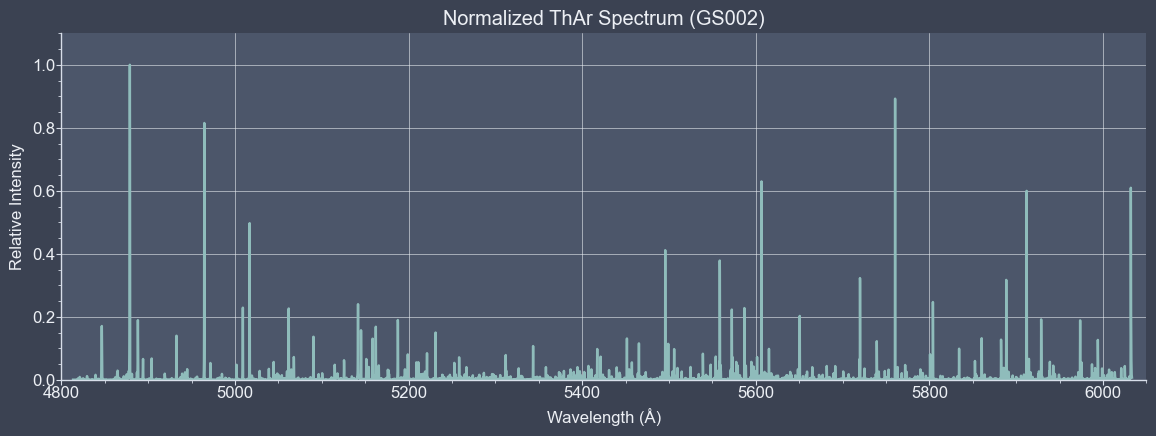

In [37]:
plt.figure(figsize = (14, 4.5))
plt.plot(ThAr02_85_wavelength, ThAr03_85_spec)
plt.ylim(0, 1.1)
plt.xlim(4800, 6050)
plt.ylabel('Relative Intensity')
plt.xlabel('Wavelength (Å)')
plt.title('Normalized ThAr Spectrum (GS002)')
plt.savefig('ThAr02_85_wavesol.png', bbox_inches='tight')
plt.show()

In [18]:
ThAr01_85_peak_props_all = sf.find_peaks(ThAr01_85_spec)
ThAr02_85_peak_props_all = sf.find_peaks(ThAr02_85_spec)
ThAr03_85_peak_props_all = sf.find_peaks(ThAr03_85_spec)

In [19]:
#do I need to centroid?
ThAr01_85_peak_wavelengths_all = wavesol_eq(ThAr01_85_peak_props_all[0])
ThAr01_85_peak_fwhm_all = wavesol_eq(ThAr01_85_peak_props_all[3]) - 4812
ThAr02_85_peak_wavelengths_all = wavesol_eq(ThAr02_85_peak_props_all[0])
ThAr02_85_peak_fwhm_all = wavesol_eq(ThAr02_85_peak_props_all[3]) - 4812
ThAr03_85_peak_wavelengths_all = wavesol_eq(ThAr03_85_peak_props_all[0])
ThAr03_85_peak_fwhm_all = wavesol_eq(ThAr03_85_peak_props_all[3]) - 4812

ThAr_85_peak_wavelengths_all = np.concatenate((ThAr01_85_peak_wavelengths_all, ThAr02_85_peak_wavelengths_all, ThAr03_85_peak_wavelengths_all))
ThAr_85_peak_fwhm_all = np.concatenate((ThAr01_85_peak_fwhm_all, ThAr02_85_peak_fwhm_all, ThAr03_85_peak_fwhm_all))
ThAr_85_peak_wavelengths_all_clean = np.array([])
ThAr_85_peak_fwhm_all_clean = np.array([])
for x in range(ThAr_85_peak_wavelengths_all.size):
    wave = ThAr_85_peak_wavelengths_all[x]
    if wave >= 5050 and wave <= 5950:
        ThAr_85_peak_wavelengths_all_clean = np.append(ThAr_85_peak_wavelengths_all_clean, ThAr_85_peak_wavelengths_all[x])
        ThAr_85_peak_fwhm_all_clean = np.append(ThAr_85_peak_fwhm_all_clean, ThAr_85_peak_fwhm_all[x])
    else:
        pass

0.2601620833979723


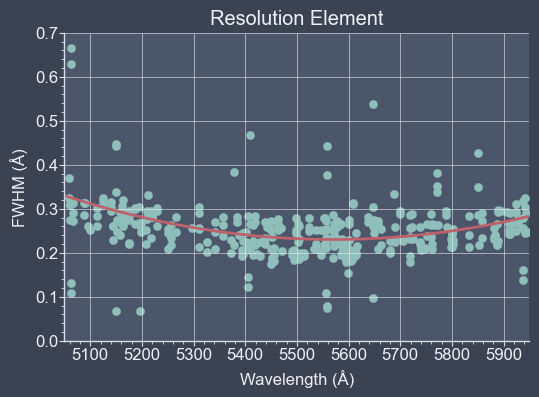

In [38]:
plt.figure(figsize = (6, 4))
plt.scatter(ThAr_85_peak_wavelengths_all_clean, ThAr_85_peak_fwhm_all_clean, c = '#8fbebb', lw = 0.25)
plt.xlim(5050, 5950)

wave_range = np.linspace(5050, 5950, 901)

coeff_res_element = np.polyfit(ThAr_85_peak_wavelengths_all_clean, ThAr_85_peak_fwhm_all_clean, 2)
eq_res_element = np.poly1d(coeff_res_element)
res_element_fit = eq_res_element(wave_range)
plt.plot(wave_range, res_element_fit, lw = 2, c = '#bf616a')

dlambda = np.median(ThAr_85_peak_fwhm_all)
print(dlambda)

plt.xlabel('Wavelength (Å)')
plt.ylabel('FWHM (Å)')
plt.ylim(0, 0.7)
plt.title('Resolution Element')
plt.savefig('resolution_element.png', bbox_inches='tight')
plt.show()

22063.953044981692


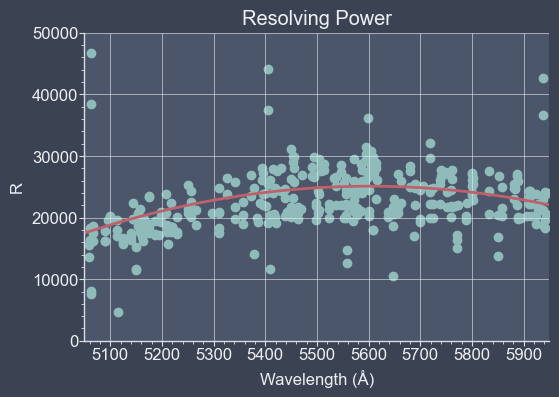

In [39]:
R_array = ThAr_85_peak_wavelengths_all_clean/ThAr_85_peak_fwhm_all_clean
R = np.median(R_array)
print(R)

coeff_R = np.polyfit(ThAr_85_peak_wavelengths_all_clean, R_array, 2)
eq_R = np.poly1d(coeff_R)
R_fit = eq_R(wave_range)

plt.figure(figsize = (6, 4))
plt.plot(wave_range, R_fit, lw = 2, c = '#bf616a')

plt.scatter(ThAr_85_peak_wavelengths_all_clean, R_array)
plt.xlabel('Wavelength (Å)')
plt.ylabel('R')
plt.title('Resolving Power')
plt.xlim(5050, 5950)
plt.ylim(0, 50000)
plt.savefig('resolving_power.png', bbox_inches='tight')
plt.show()

In [25]:
pix_diff = np.max(ThAr_85_pix) - np.min(ThAr_85_pix)
print(pix_diff)
ThAr03_diff = np.max(ThAr03_85_wavelength) - np.min(ThAr03_85_wavelength)
ThAr02_diff = np.max(ThAr02_85_wavelength) - np.min(ThAr02_85_wavelength)
ThAr01_diff = np.max(ThAr01_85_wavelength) - np.min(ThAr01_85_wavelength)
wave_diff = np.mean([ThAr03_diff, ThAr02_diff, ThAr01_diff])
print(wave_diff)

ratio = pix_diff/wave_diff
print(ratio)

pixels = ratio * 0.0018
print(pixels)

9575.0
1219.9544738970308
7.848653539843627
0.014127576371718529
